In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

### Preprocess Function

In [119]:
def preprocess(filepath):
    try:
        housing_data = pd.read_csv(filepath)

        # Dealing with outliers
        # Trim off the top and bottom 15th percentile of data by price
        trim_df = q1, q9 = housing_data['price'].quantile([0.15,0.85])
        mask_df = housing_data['price'].between(q1,q9)
        new_data = housing_data[mask_df]

        # Rename columns
        new_data.rename(columns={'title':'house_type'}, inplace=True)

        # remove states with very few records
        few_records = new_data['state'].value_counts()
        new_data = new_data[~new_data['state'].isin(few_records[few_records < 20].index)]

        #reset the dataframe index 
        new_data.reset_index(inplace=True)
        del new_data['index']

        print('Data preprocessed successfully')
        return new_data, numerical_features, categorical_features
    except Exception as e:
        print('There was an error preprocessing the data: \n', e)
    

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
import joblib

def linear_regression_model(new_data):


    # Get numerical features
    numerical_features = [features for features in housing_data.columns if housing_data[features].dtype!='O']

    # Get categorical features
    categorical_features = [feature for feature in new_data.columns if new_data[feature].dtypes=='O']
    
    X = new_data.drop(['price'], axis=1)
    y = new_data['price']
    X_train,X_test,y_train,y_test=train_test_split(X , y, test_size=0.1, random_state=828)
    
    # OneHotEncoding
    ohe = OneHotEncoder()
    ohe.fit(X[categorical_features])
    column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),\
                                     categorical_features),remainder='passthrough')
    
    # Initailize Regresion Model
    reg = LinearRegression()
    
    # Make a pipeline
    pipe = make_pipeline(column_trans, reg)
    
    #fit the model
    pipe.fit(X_train,y_train)
    y_pred = pipe.predict(X_test)
    
    # Save the model
    joblib.dump(pipe,open('LinearRegressionModel.pkl','wb'))
    
    score = r2_score(y_test,y_pred)
    print(f"Linear Regression Model R2 Score: ")
    return score

In [127]:
filepath = 'nigeria_houses_data.csv'
new_data = preprocess(filepath)

Data preprocessed successfully


C:\Users\Abraham Audu\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [130]:
linear_regression_model(new_data)

Linear Regression Model R2 Score: 


0.46398740219201273

### _Load Dataset_

In [2]:
housing_data = pd.read_csv('nigeria_houses_data.csv')

### EDA

In [3]:
housing_data.shape

(24326, 8)

In [4]:
#preview the data

housing_data.head(10)

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6.0,5.0,5.0,4.0,Detached Duplex,Mabushi,Abuja,450000000.0
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,800000000.0
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0
5,5.0,5.0,6.0,1.0,Detached Duplex,Lekki,Lagos,450000000.0
6,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,65000000.0
7,2.0,2.0,3.0,6.0,Detached Bungalow,Epe,Lagos,12000000.0
8,1.0,1.0,1.0,1.0,Detached Duplex,Lekki,Lagos,200000000.0
9,4.0,4.0,5.0,5.0,Detached Duplex,Ajah,Lagos,60000000.0


In [5]:
# Checkout all the columns

housing_data.columns

Index(['bedrooms', 'bathrooms', 'toilets', 'parking_space', 'title', 'town',
       'state', 'price'],
      dtype='object')

In [6]:
# Basic stats of the data

housing_data.describe()

,bedrooms,bathrooms,toilets,parking_space,price
count,24326.000000,24326.000000,24326.000000,24326.000000,2.432600e+04
mean,4.338814,4.600798,5.176355,4.041725,3.013802e+08
std,1.138497,1.163161,1.226253,1.399936,1.220403e+10
min,1.000000,1.000000,1.000000,1.000000,9.000000e+04
25%,4.000000,4.000000,5.000000,4.000000,5.200000e+07
50%,4.000000,5.000000,5.000000,4.000000,8.500000e+07
75%,5.000000,5.000000,6.000000,4.000000,1.600000e+08
max,9.000000,9.000000,9.000000,9.000000,1.800000e+12


In [7]:
# Check for missing values

housing_data.isnull().sum()

bedrooms         0
bathrooms        0
toilets          0
parking_space    0
title            0
town             0
state            0
price            0
dtype: int64

In [8]:
# Get numerical features

numerical_features = [features for features in housing_data.columns if housing_data[features].dtype!='O']

In [9]:
housing_data[numerical_features].head()

,bedrooms,bathrooms,toilets,parking_space,price
0,6.0,5.0,5.0,4.0,450000000.0
1,4.0,5.0,5.0,4.0,800000000.0
2,4.0,5.0,5.0,4.0,120000000.0
3,4.0,4.0,5.0,6.0,40000000.0
4,4.0,4.0,5.0,2.0,75000000.0


In [10]:
# Discrete features

discrete_features = [feature for feature in numerical_features if len(housing_data[feature].unique())<=25]
discrete_features

['bedrooms', 'bathrooms', 'toilets', 'parking_space']

In [11]:
housing_data[discrete_features]

,bedrooms,bathrooms,toilets,parking_space
0,6.0,5.0,5.0,4.0
1,4.0,5.0,5.0,4.0
2,4.0,5.0,5.0,4.0
3,4.0,4.0,5.0,6.0
4,4.0,4.0,5.0,2.0
...,...,...,...,...
24321,2.0,2.0,2.0,4.0
24322,4.0,5.0,5.0,4.0
24323,4.0,5.0,5.0,4.0
24324,3.0,4.0,4.0,3.0


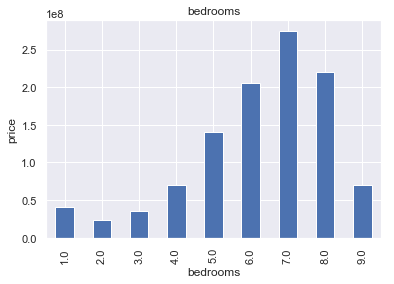

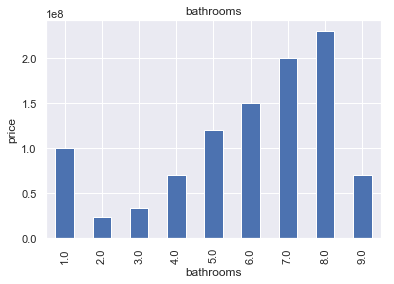

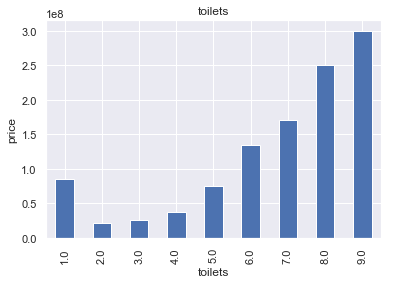

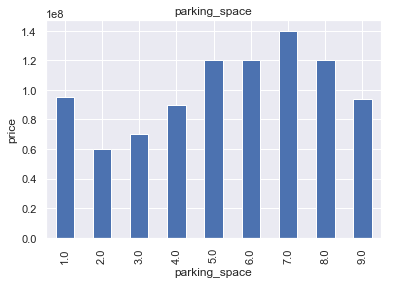

In [13]:
# Relationship between discrete features and sale price
data = housing_data.copy()
for feature in discrete_features:
    data.groupby(feature)['price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('price')
    plt.title(feature)
    plt.show()
    

In [14]:
# Continuous features

continuous_features = [feature for feature in numerical_features if feature not in discrete_features]
continuous_features

['price']

No continuous features

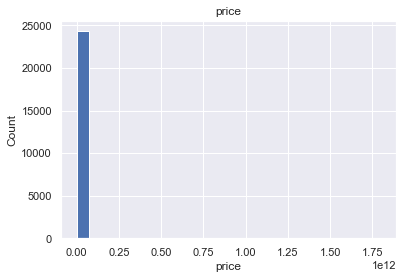

In [15]:
# Visualize price distribution

data = housing_data.copy()
for feature in continuous_features:
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

There seems to be an outlier skewing the plot

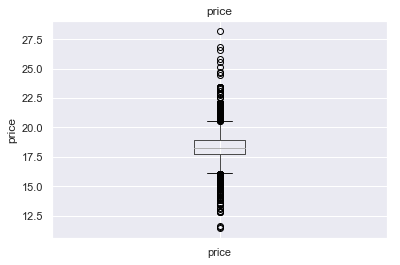

In [16]:
# Dealing with outliers

# Visualize the outliers with a Box plot
for feature in continuous_features:

        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [28]:
print("maximim house price: ",housing_data['price'].max())
print("minimum house price: ",housing_data['price'].min())

maximim house price:  1800000000000.0
minimum house price:  90000.0


N1.8Tr is an unrealistic house price <br>
N90,000 is also an unrealistic house price

In [19]:
# Dealing with outliers

# Trim off the top and bottom 15th percentile of data by price
trim_df = q1, q9 = housing_data['price'].quantile([0.15,0.85])
mask_df = housing_data['price'].between(q1,q9)
new_data = housing_data[mask_df]
new_data

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0
6,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,65000000.0
8,1.0,1.0,1.0,1.0,Detached Duplex,Lekki,Lagos,200000000.0
...,...,...,...,...,...,...,...,...
24318,4.0,5.0,5.0,4.0,Semi Detached Duplex,Lekki,Lagos,110000000.0
24320,3.0,4.0,4.0,5.0,Detached Duplex,Lekki,Lagos,80000000.0
24323,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,68000000.0
24324,3.0,4.0,4.0,3.0,Block of Flats,Victoria Island (VI),Lagos,78000000.0


In [29]:
print("New maximim house price: ",new_data['price'].max())
print("New minimum house price: ",new_data['price'].min())

New maximim house price:  260000000.0
New minimum house price:  35000000.0


These new max and min are realistic

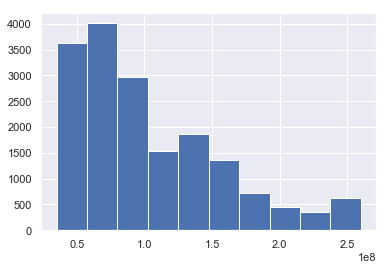

In [22]:
# Price distribution

# Histogram Plot
new_data['price'].hist()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


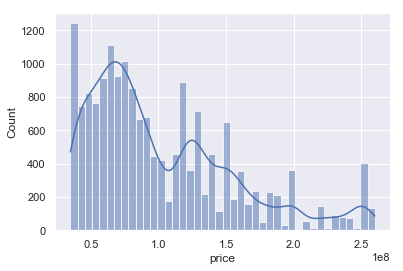

In [23]:
# Another Histogram Plot
sns.histplot(new_data['price'], kde=True)

### _Categorical Variables_

In [45]:
## Dealing with the categorical variables

categorical_features = [feature for feature in new_data.columns if new_data[feature].dtypes=='O']
categorical_features

['house_type', 'town', 'state']

In [46]:
new_data[categorical_features].head()

,house_type,town,state
0,Detached Duplex,Lekki,Lagos
1,Detached Duplex,Ajah,Lagos
2,Semi Detached Duplex,Lekki,Lagos
3,Detached Duplex,Lekki,Lagos
4,Detached Duplex,Lekki,Lagos


In [57]:
# explore properties of categorical variables

for feature in categorical_features:
    print(f"Feature name>> {feature} ; No. of categories>> {len(new_data[feature].unique())}\n")

Feature name>> house_type ; No. of categories>> 7

Feature name>> town ; No. of categories>> 144

Feature name>> state ; No. of categories>> 21



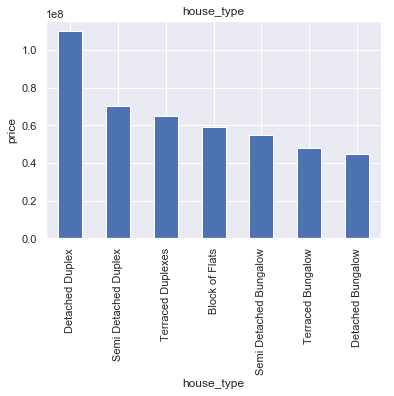

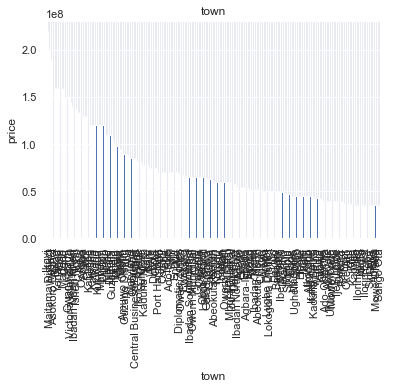

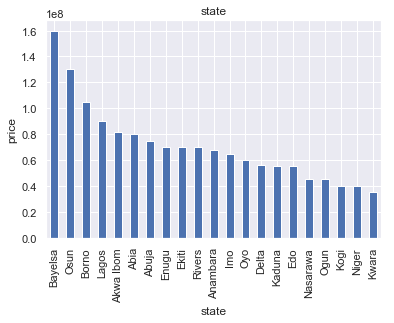

In [68]:
## Relationship between categorical features and price
data = new_data.copy()
for feature in categorical_features:
    data.groupby(feature)['price'].median().sort_values(ascending=False).plot.bar()
    plt.xlabel(feature)
    plt.ylabel('price')
    plt.title(feature)
    plt.show()
    

We need to investigate how the data is distributed across the states

In [78]:
housing_data['state'].value_counts()

Lagos          18445
Abuja           3524
Ogun             637
Oyo              477
Rivers           444
Imo              246
Anambara         145
Enugu            128
Edo              100
Delta             63
Akwa Ibom         25
Kaduna            23
Osun              12
Ekiti              9
Nasarawa           9
Kwara              9
Abia               9
Kogi               8
Cross River        2
Katsina            2
Bayelsa            2
Borno              2
Plateau            2
Kano               2
Niger              1
Name: state, dtype: int64

In [74]:
# we will now remove states with very few records
few_records = new_data['state'].value_counts()
few_records

Lagos        13805
Abuja         2462
Rivers         339
Oyo            229
Imo            195
Ogun           141
Enugu           96
Anambara        83
Edo             51
Delta           42
Akwa Ibom       13
Kaduna           8
Ekiti            5
Abia             5
Kogi             4
Nasarawa         4
Osun             3
Borno            2
Kwara            2
Niger            1
Bayelsa          1
Name: state, dtype: int64

In [79]:
new_data = new_data[~new_data['state'].isin(few_records[few_records < 20].index)]

In [80]:
new_data['state'].value_counts()

Lagos       13805
Abuja        2462
Rivers        339
Oyo           229
Imo           195
Ogun          141
Enugu          96
Anambara       83
Edo            51
Delta          42
Name: state, dtype: int64

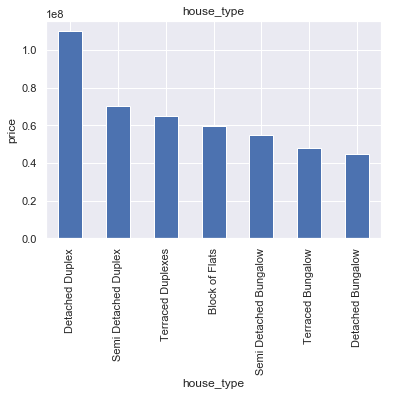

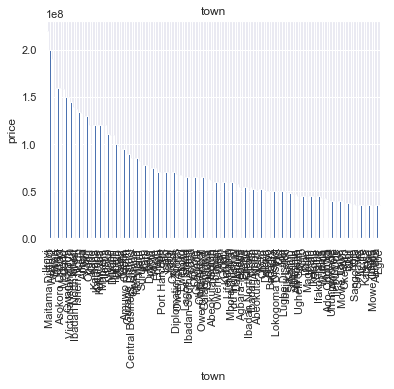

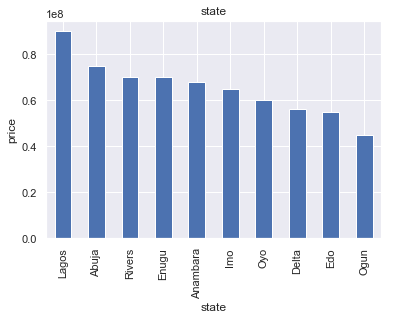

In [81]:
## Re-Visualize Relationship between categorical features and price
data = new_data.copy()
for feature in categorical_features:
    data.groupby(feature)['price'].median().sort_values(ascending=False).plot.bar()
    plt.xlabel(feature)
    plt.ylabel('price')
    plt.title(feature)
    plt.show()

In [83]:
#reset the dataframe index 
new_data.reset_index(inplace=True)
del new_data['index']
new_data

,bedrooms,bathrooms,toilets,parking_space,house_type,town,state,price
0,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0
1,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0
2,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0
3,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,65000000.0
4,1.0,1.0,1.0,1.0,Detached Duplex,Lekki,Lagos,200000000.0
...,...,...,...,...,...,...,...,...
17438,4.0,5.0,5.0,4.0,Semi Detached Duplex,Lekki,Lagos,110000000.0
17439,3.0,4.0,4.0,5.0,Detached Duplex,Lekki,Lagos,80000000.0
17440,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,68000000.0
17441,3.0,4.0,4.0,3.0,Block of Flats,Victoria Island (VI),Lagos,78000000.0


### Feature Engineering

In [84]:
from sklearn.model_selection import train_test_split

In [86]:
X = new_data.drop(['price'], axis=1)
y = new_data['price']

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [91]:
X_train

,bedrooms,bathrooms,toilets,parking_space,house_type,town,state
9589,5.0,5.0,6.0,4.0,Detached Duplex,Ibeju Lekki,Lagos
11641,4.0,4.0,5.0,3.0,Semi Detached Duplex,Lekki,Lagos
15923,4.0,4.0,5.0,2.0,Terraced Duplexes,Life Camp,Abuja
14067,4.0,5.0,6.0,4.0,Detached Duplex,Lekki,Lagos
13154,4.0,4.0,5.0,4.0,Terraced Duplexes,Lekki,Lagos
...,...,...,...,...,...,...,...
9842,4.0,4.0,4.0,4.0,Detached Bungalow,Lekki,Lagos
11350,4.0,4.0,5.0,3.0,Terraced Duplexes,Lekki,Lagos
12405,4.0,4.0,4.0,3.0,Detached Duplex,Lekki,Lagos
6270,5.0,5.0,6.0,4.0,Detached Duplex,Lekki,Lagos


In [117]:
X_test

,bedrooms,bathrooms,toilets,parking_space,house_type,town,state
9804,4.0,5.0,6.0,3.0,Semi Detached Duplex,Lekki,Lagos
14512,5.0,6.0,7.0,2.0,Detached Duplex,Karsana,Abuja
14088,3.0,3.0,4.0,3.0,Block of Flats,Ikeja,Lagos
9743,4.0,4.0,5.0,3.0,Semi Detached Duplex,Lekki,Lagos
5703,4.0,5.0,5.0,4.0,Terraced Duplexes,Jahi,Abuja
...,...,...,...,...,...,...,...
13099,4.0,4.0,5.0,4.0,Terraced Duplexes,Life Camp,Abuja
63,5.0,6.0,6.0,4.0,Detached Duplex,Lekki,Lagos
4463,1.0,1.0,1.0,1.0,Block of Flats,Ajah,Lagos
6429,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja


###### _OneHotEncoding_

In [116]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [94]:
ohe = OneHotEncoder()
ohe.fit(X[categorical_features])

OneHotEncoder()

In [97]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),\
                                     categorical_features),remainder='passthrough')
            

### Build the model (Linear Regression Model)

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [99]:
# Initailize Regresion Model
reg = LinearRegression()

In [100]:
# Make a pipeline
pipe = make_pipeline(column_trans, reg)

In [102]:
#fit the model
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)

In [103]:
r2_score(y_test,y_pred)

0.40236269297702565

In [118]:
# Optimize the model

scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))
print("R2 Score: ", scores[np.argmax(scores)])

# Optimum random state 
print("Optimum random_state: ", scores.index(0.46398740219201273))

0.46398740219201273

In [109]:
# Sample Prediction with New Data

pipe.predict(pd.DataFrame(columns=['bedrooms',
                                   'bathrooms',
                                   'toilets',
                                   'parking_space',
                                   'house_type','town', 'state'], data=np.array([3,5,5,4,'Block of Flats','Ojo','Lagos']).reshape(1,7)))

array([32207659.61018614])

828